In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier, MLPRegressor
seed=1235

In [2]:
#fetch_lfw_people dataset proporcionado por scikit-learn muy usado en tareas de reconocimiento facial
faces = fetch_lfw_people(min_faces_per_person=60)

- data: Un array NumPy que contiene las imágenes de las caras. Cada fila representa una imagen, y las columnas son los píxeles de la imagen.

- images: Similar a data, pero es una lista de arrays NumPy que contienen las imágenes. Es más fácil de visualizar, ya que cada elemento de la lista es una imagen.

- target: Un array NumPy que contiene las etiquetas asociadas a cada imagen. Cada etiqueta es un índice que identifica a la persona en la imagen.

- target_names: Una lista que contiene los nombres de las personas correspondientes a cada etiqueta.

- DESCR: Una cadena de texto que proporciona una descripción del conjunto de datos.

- COL_NAMES: Una lista que contiene los nombres de las columnas en el conjunto de datos.

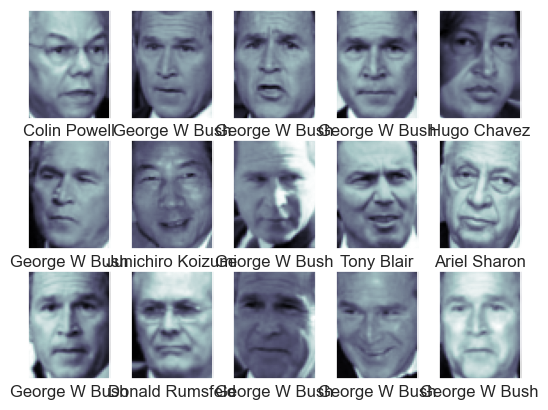

In [3]:
## ejemplo de las primeras 15 imagenes (de las 1348)
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [4]:
#dividimos en train/test
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target,
                                                random_state=seed)

In [5]:
# Reducimos la dimensionalidad de las imágenes aplicando un análisis de componentes principales
pca = RandomizedPCA(n_components=150, whiten=True, random_state=seed)
faces_pca = pca.fit_transform(faces.data)

In [9]:
red1 = MLPClassifier(random_state=seed, hidden_layer_sizes=(5),activation='tanh',
                     alpha=0.001,solver='adam',max_iter=1000)
# Construir el modelo de red ajustando los pesos a datos de train
red1.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=5,
              max_iter=1000, random_state=1235)

In [11]:
# Realizar predicciones en el conjunto de prueba
y_pred = red1.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
#Se podría usar un pipline model = make_pipeline(pca, svc)

Accuracy: 0.03560830860534125


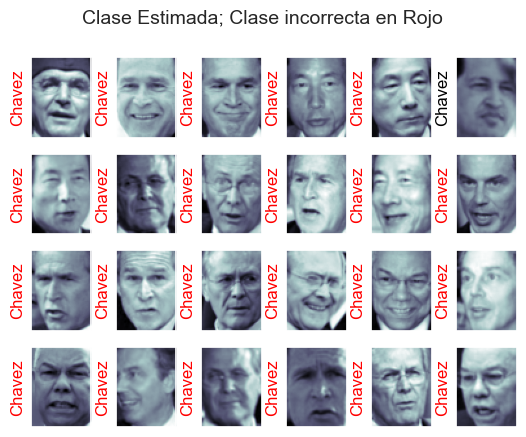

In [13]:
matrix = confusion_matrix(y_pred, y_test)
matrix

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[y_pred[i]].split()[-1],
                   color='black' if y_pred[i] == y_test[i] else 'red')
fig.suptitle('Clase Estimada; Clase incorrecta en Rojo ', size=14);